In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
dataset = pd.read_csv('diabetes.csv')
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
dataset.info()
dataset.shape
dataset.describe().T
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Any missing data or NaN in the dataset: False


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

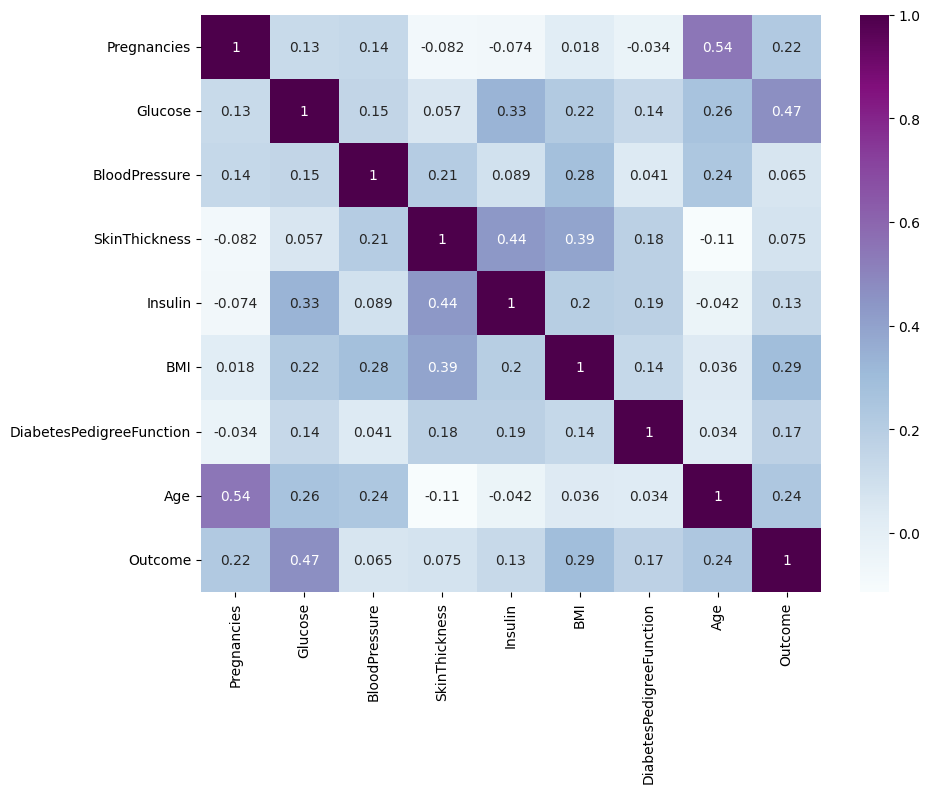

In [7]:
corr_var=dataset.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

In [8]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier7 = LogisticRegression()
classifier7.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_curve,
    roc_auc_score
)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\DELL\AppData\Local\Temp\ipykernel_16648\1425773606.py:2: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('D:\T.Y YEAR\MACHINE LEARNING\LAB ASSIMENTS\diabetes.csv')  # Adjust if needed


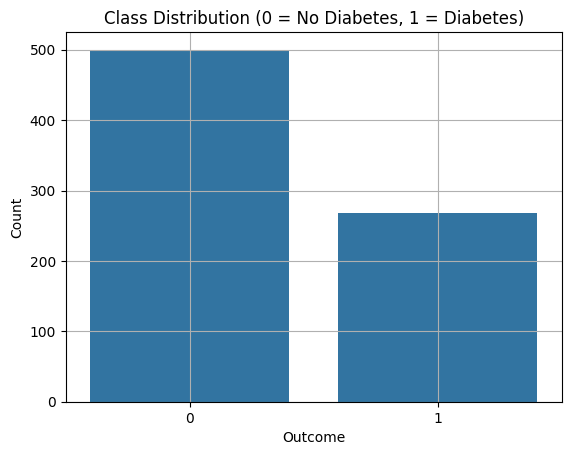

In [13]:
# Load dataset
df = pd.read_csv('D:\T.Y YEAR\MACHINE LEARNING\LAB ASSIMENTS\diabetes.csv')  # Adjust if needed

# Basic Checks
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

# Class distribution
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution (0 = No Diabetes, 1 = Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.grid(True)
plt.show()



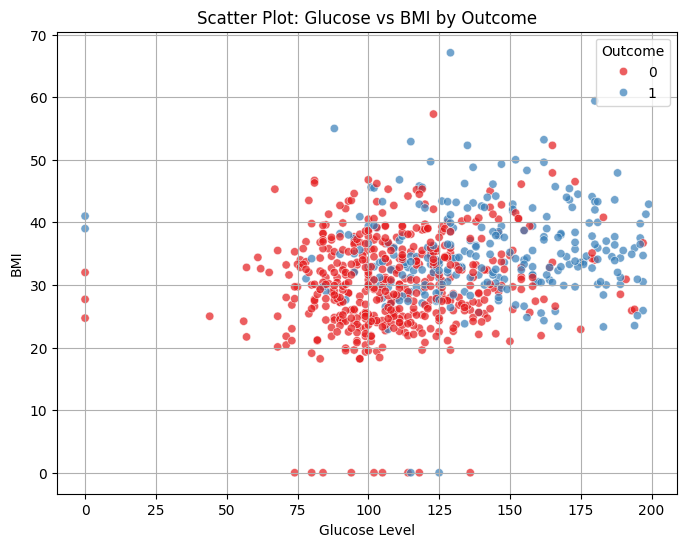

In [14]:
# Scatter plot of features (Glucose vs BMI by Outcome)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='Set1', alpha=0.7)
plt.title('Scatter Plot: Glucose vs BMI by Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

In [15]:
# Feature & target selection
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=16
)

# Model training
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Prediction
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, logreg.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {logreg.intercept_[0]:.4f}")

# Evaluation metrics
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")




Accuracy: 0.7662

Model Coefficients:
Pregnancies: 0.1127
Glucose: 0.0314
BloodPressure: -0.0151
SkinThickness: 0.0019
Insulin: -0.0018
BMI: 0.0858
DiabetesPedigreeFunction: 1.0057
Age: 0.0209
Intercept: -7.8545

Confusion Matrix:
[[90 10]
 [26 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       100
           1       0.74      0.52      0.61        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154

ROC AUC Score: 0.8622


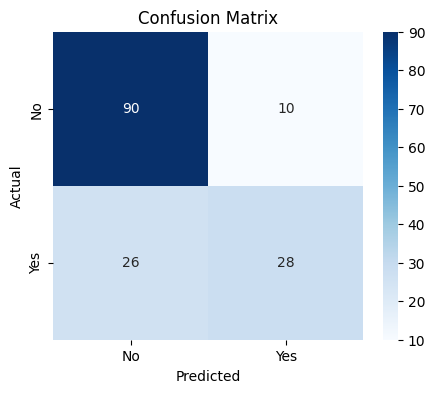

In [16]:
# Confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

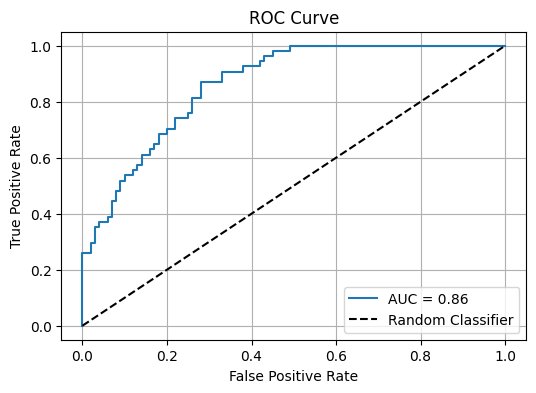

In [17]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

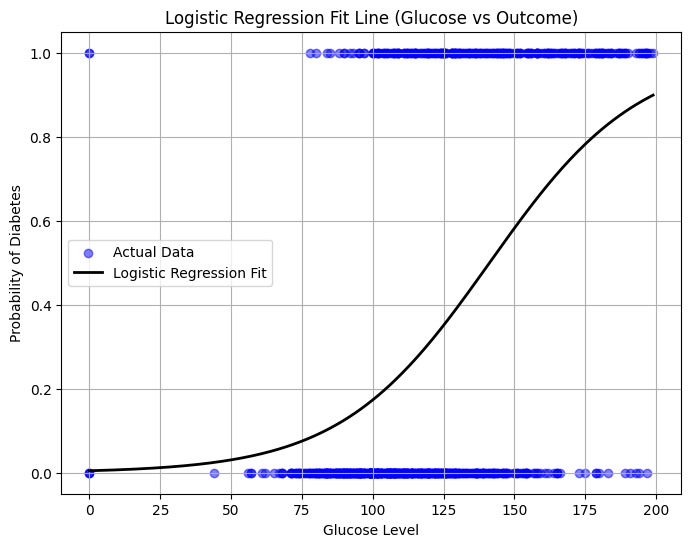

In [18]:
# Logistic Regression Fit for Glucose vs Outcome
X_glucose = df[['Glucose']].values
y_outcome = df['Outcome'].values

log_reg_glucose = LogisticRegression()
log_reg_glucose.fit(X_glucose, y_outcome)

X_range = np.linspace(X_glucose.min(), X_glucose.max(), 300).reshape(-1, 1)
y_prob_glucose = log_reg_glucose.predict_proba(X_range)[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(X_glucose, y_outcome, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_range, y_prob_glucose, color='black', linewidth=2, label='Logistic Regression Fit')
plt.title('Logistic Regression Fit Line (Glucose vs Outcome)')
plt.xlabel('Glucose Level')
plt.ylabel('Probability of Diabetes')
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.7662

Confusion Matrix:
[[90 10]
 [26 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       100
           1       0.74      0.52      0.61        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154

ROC AUC Score: 0.8622


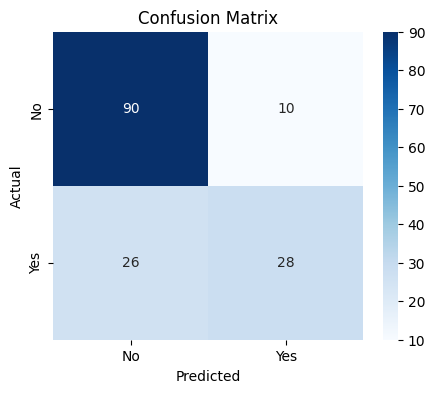

In [19]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[90, 10],
       [26, 28]])

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import numpy as np

# Simulated diabetes dataset (for demo purposes)
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Let's simulate a binary target (1 = Diabetes, 0 = No Diabetes)
y = (data.target > 140).astype(int)

# Select and rename 3 columns to match your manual input
df = df[['bmi', 's1', 'age']]  # example features
df.columns = ['Glucose', 'BMI', 'Age']  # must match exactly

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# ✅ Manual input with correct column names and order
manual_input = pd.DataFrame([{
    'Glucose': 100,
    'BMI': 30.0,
    'Age': 45
}], columns=['Glucose', 'BMI', 'Age'])  # ensure correct order

# Predict
prediction = model.predict(manual_input)

# Output
print(f"Predicted Outcome (0 = No Diabetes, 1 = Diabetes): {prediction[0]}")

Predicted Outcome (0 = No Diabetes, 1 = Diabetes): 1


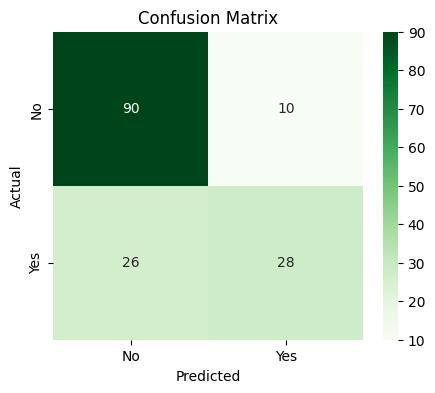

In [26]:
# Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
# Accuracy
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [89, 154]